# Data Science Project

In [1]:
# import relevent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

np.random.seed(1)
%matplotlib inline

In [2]:
# Read in the data file
rental_df = pd.read_csv("Data Science Project - Excel.csv")

In [3]:
rental_df.head(10)

obs       date  season  holiday  working_day  weather_condition       temp  \
0    1   1/1/2011       1        0            0                  2  14.110847   
1    2   1/2/2011       1        0            0                  2  14.902598   
2    3   1/3/2011       1        0            1                  1   8.050924   
3    4   1/4/2011       1        0            1                  1   8.200000   
4    5   1/5/2011       1        0            1                  1   9.305237   
5    6   1/6/2011       1        0            1                  1   8.378268   
6    7   1/7/2011       1        0            1                  2   8.057402   
7    8   1/8/2011       1        0            0                  2   6.765000   
8    9   1/9/2011       1        0            0                  1   5.671653   
9   10  1/10/2011       1        0            1                  1   6.184153   

   feel_temp  humidity  wind_speed  occasional  members  rental  
0   18.18125  0.805833   10.749882         331      654     985  
1   17.68695  0.696087   16.652113         131      670     801  
2    9.47025  0.437273   16.636703         120     1229    1349  
3   10.60610  0.590435   10.739832         108     1454    1562  
4   11.46350  0.436957   12.522300          82     1518    1600  
5   11.66045  0.518261    6.000868          88     1518    1606  
6   10.44195  0.498696   11.304642         148     1362    1510  
7    8.11270  0.535833   17.875868          68      891     959  
8    5.80875  0.434167   24.250650          54      768     822  
9    7.54440  0.482917   14.958889          41     1280    1321

In [4]:
rental_df.shape

(731, 13)

In [5]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   obs                731 non-null    int64  
 1   date               731 non-null    object 
 2   season             731 non-null    int64  
 3   holiday            731 non-null    int64  
 4   working_day        731 non-null    int64  
 5   weather_condition  731 non-null    int64  
 6   temp               731 non-null    float64
 7   feel_temp          731 non-null    float64
 8   humidity           731 non-null    float64
 9   wind_speed         731 non-null    float64
 10  occasional         731 non-null    int64  
 11  members            731 non-null    int64  
 12  rental             731 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.4+ KB


## 1) Pre-Processing

In [6]:
# Create the variable year and month

# Initialize arrays for storage
month = []
year = []

# For each row, split the string by backslash and extract corresponding values (year and month)
for row in rental_df["date"]:
    date_list = row.split("/")
    year.append(date_list[2])
    month.append(date_list[0])
    
rental_df["year"] = year
rental_df["month"] = month

In [7]:
# dealing with missing values in feel_temp
rental_df.isnull()

obs   date  season  holiday  working_day  weather_condition   temp  \
0    False  False   False    False        False              False  False   
1    False  False   False    False        False              False  False   
2    False  False   False    False        False              False  False   
3    False  False   False    False        False              False  False   
4    False  False   False    False        False              False  False   
..     ...    ...     ...      ...          ...                ...    ...   
726  False  False   False    False        False              False  False   
727  False  False   False    False        False              False  False   
728  False  False   False    False        False              False  False   
729  False  False   False    False        False              False  False   
730  False  False   False    False        False              False  False   

     feel_temp  humidity  wind_speed  occasional  members  rental   year  \
0        False     False       False       False    False   False  False   
1        False     False       False       False    False   False  False   
2        False     False       False       False    False   False  False   
3        False     False       False       False    False   False  False   
4        False     False       False       False    False   False  False   
..         ...       ...         ...         ...      ...     ...    ...   
726      False     False       False       False    False   False  False   
727      False     False       False       False    False   False  False   
728      False     False       False       False    False   False  False   
729      False     False       False       False    False   False  False   
730      False     False       False       False    False   False  False   

     month  
0    False  
1    False  
2    False  
3    False  
4    False  
..     ...  
726  False  
727  False  
728  False  
729  False  
730  False  

[731 rows x 15 columns]

In [8]:
# Sum up the number of rows with missing values
rental_df.isnull().any(axis = 1).sum()

0

It looks like this dataset has no missing values. If we had to deal with missing values for the feel_temp variable, here are a few options we can try: <br>
1) Filling the missing value with the mean or the median of the column <br>
2) Filling the missing value with the previous one <br>
3) Find out the average difference between temp and feel_temp, and use that as an estimate to fill in the values for feel_temp <br>
For example, if temperature is on average 3 degrees less than feel temp,then we can take the value of temp, add 3 degrees and that would be our value for feel_temp for that row  


## 2) Descriptive Statistics

In [9]:
rental_df.describe()

obs      season     holiday  working_day  weather_condition  \
count  731.000000  731.000000  731.000000   731.000000         731.000000   
mean   366.000000    2.496580    0.028728     0.683995           1.395349   
std    211.165812    1.110807    0.167155     0.465233           0.544894   
min      1.000000    1.000000    0.000000     0.000000           1.000000   
25%    183.500000    2.000000    0.000000     0.000000           1.000000   
50%    366.000000    3.000000    0.000000     1.000000           1.000000   
75%    548.500000    3.000000    0.000000     1.000000           2.000000   
max    731.000000    4.000000    1.000000     1.000000           3.000000   

             temp   feel_temp    humidity  wind_speed   occasional  \
count  731.000000  731.000000  731.000000  731.000000   731.000000   
mean    20.310776   23.717699    0.627894   12.762576   848.176471   
std      7.505091    8.148059    0.142429    5.192357   686.622488   
min      2.424346    3.953480    0.000000    1.500244     2.000000   
25%     13.820424   16.892125    0.520000    9.041650   315.500000   
50%     20.431653   24.336650    0.626667   12.125325   713.000000   
75%     26.872077   30.430100    0.730209   15.625371  1096.000000   
max     35.328347   42.044800    0.972500   34.000021  3410.000000   

           members       rental  
count   731.000000   731.000000  
mean   3656.172367  4504.348837  
std    1560.256377  1937.211452  
min      20.000000    22.000000  
25%    2497.000000  3152.000000  
50%    3662.000000  4548.000000  
75%    4776.500000  5956.000000  
max    6946.000000  8714.000000

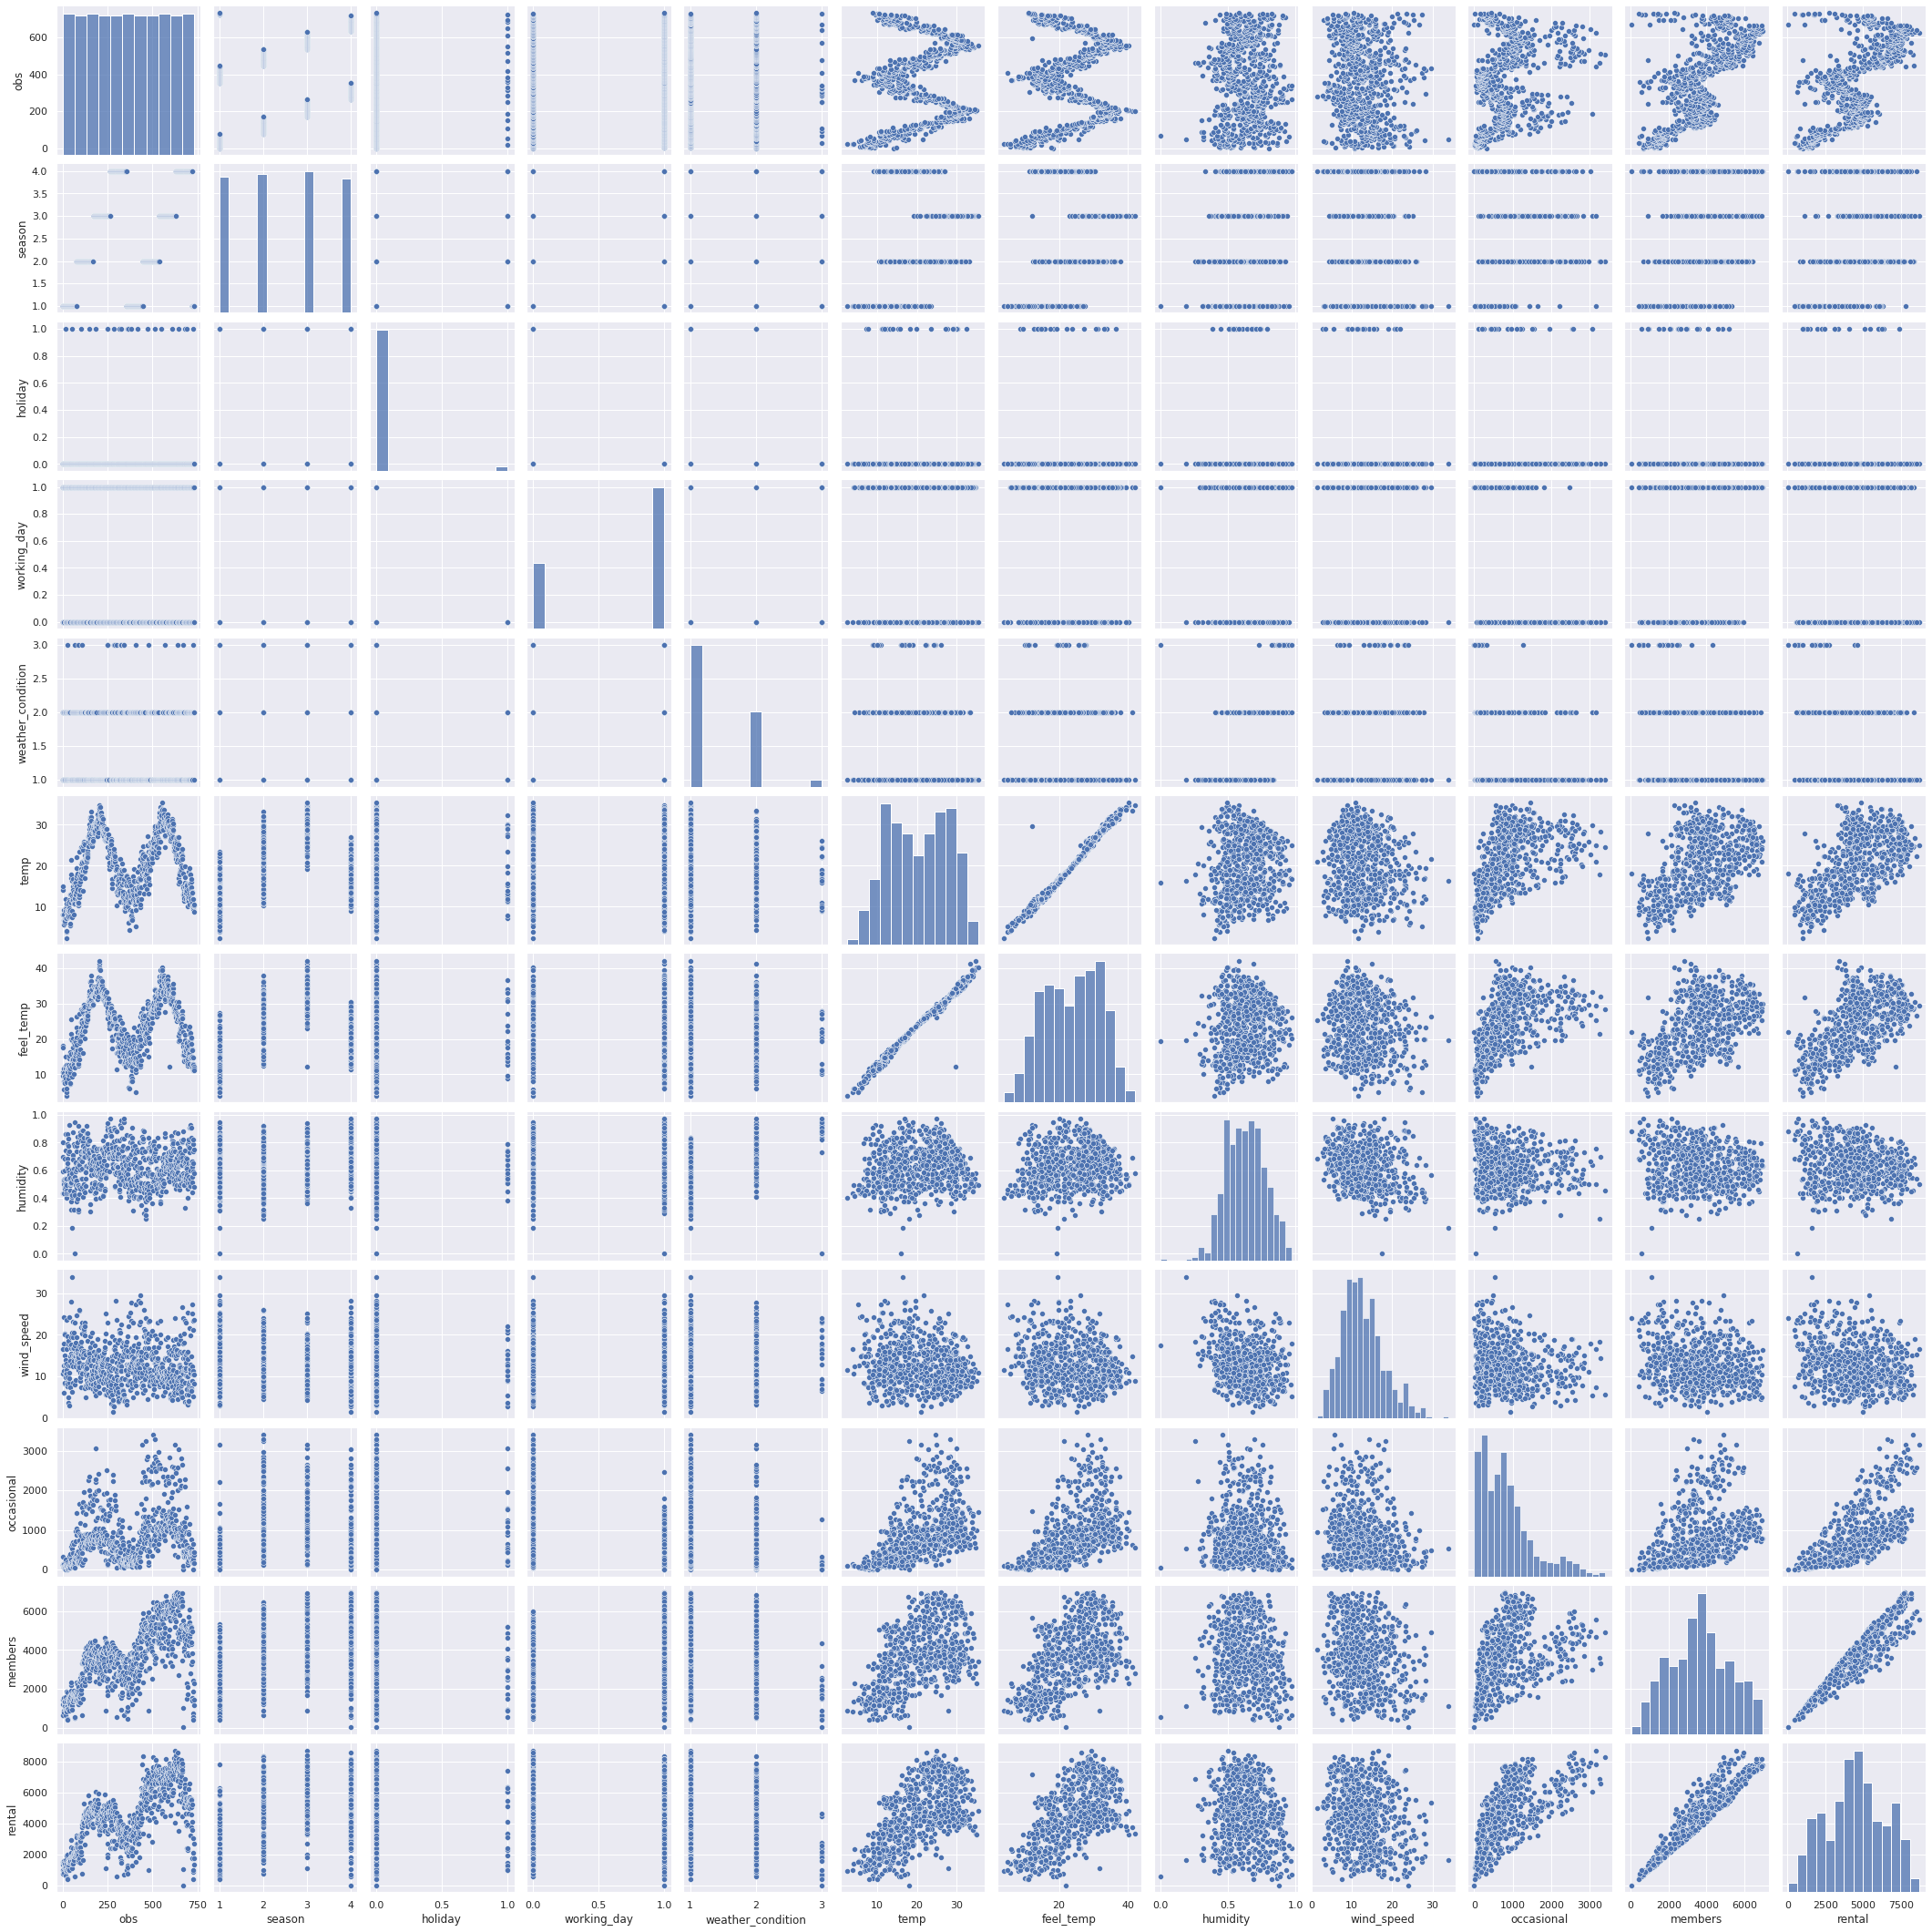

In [10]:
# An easy and convienient way to look at the distribution of each variable, 
# And their relationship with other variables is with pairplot. 
sns.pairplot(rental_df)

#### Wow! The above plot shows us ALOT. <br>
For example, we can see most of our variables are normally distributed, 1 uniformly distrubuted,some normally distributed and skewed, we have some multimodel graphs, etc. <br>
As for the variables relationship with the response (The last column), we can see we have some linear relationships, some noise (no patterns), and some form of non-linear patterns. <br>
Furthermore, some of the other variables also have linear and non-linear patterns amongst themselves. <br>
Lets dive a bit deeper into these primilinary findings below

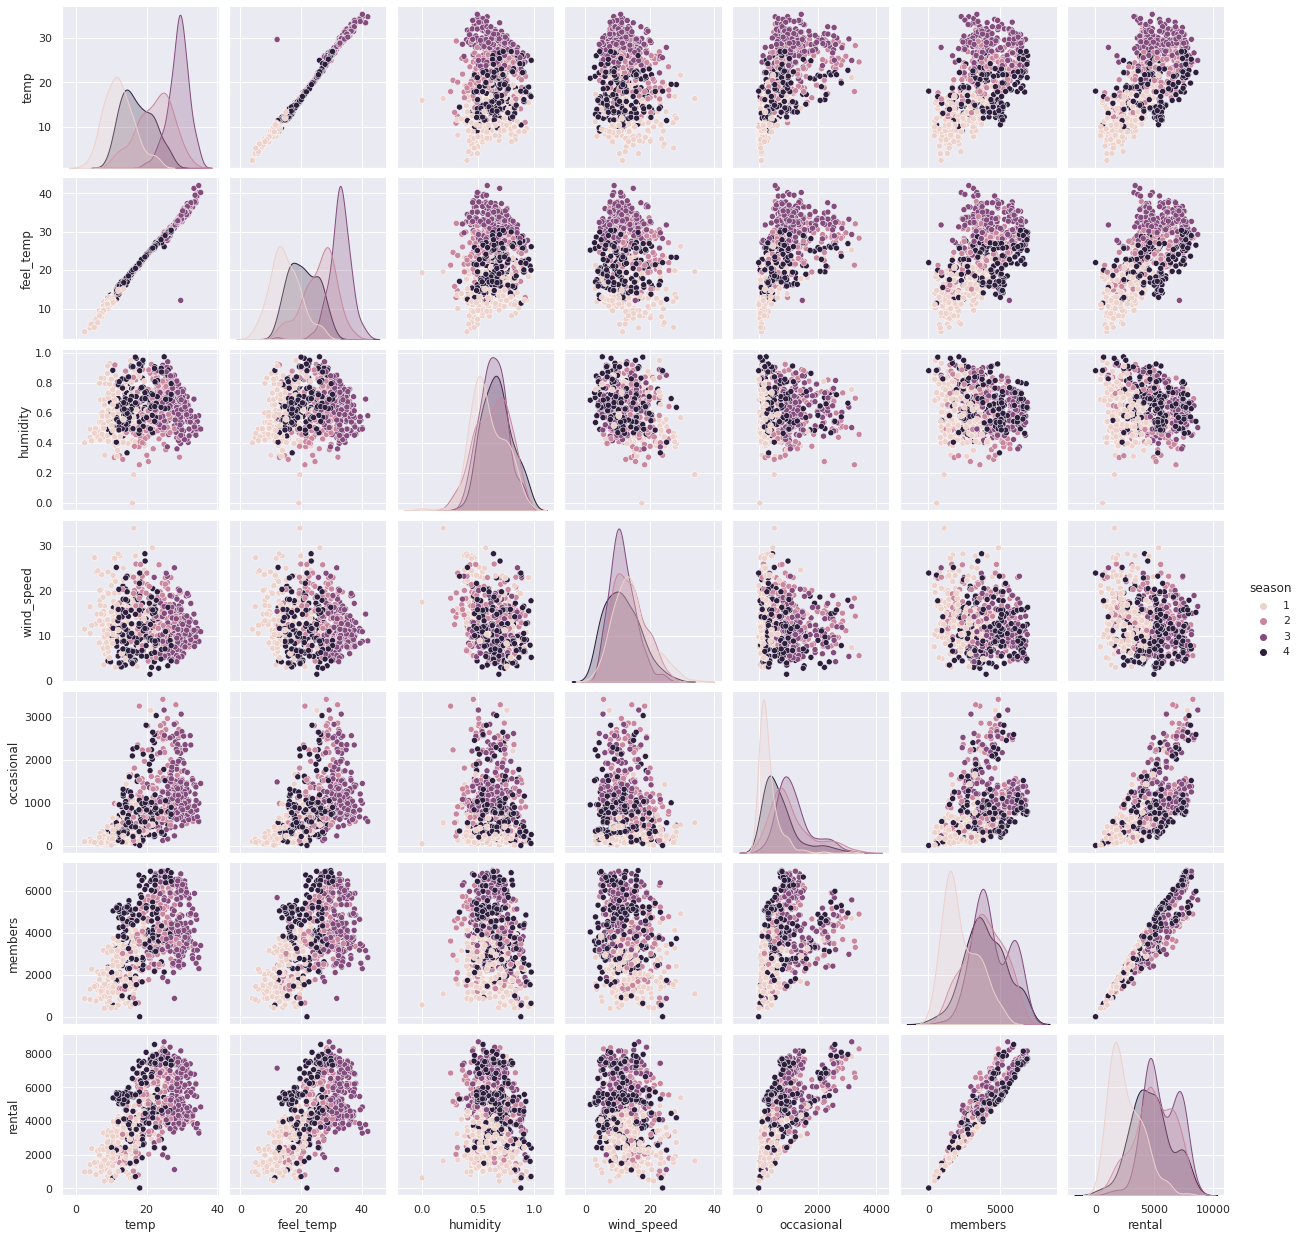

In [11]:
# Drop working_day, weather condition, holiday, (dummy encoded variables) and record index (obs)
temp_df = rental_df.drop(['holiday', 'working_day', 'weather_condition', "obs"], axis=1)
# color by the season
sns.pairplot(temp_df, hue = 'season')

In [12]:
rental_df.corr()

obs    season   holiday  working_day  \
obs                1.000000  0.412224  0.016145    -0.004337   
season             0.412224  1.000000 -0.010537     0.012485   
holiday            0.016145 -0.010537  1.000000    -0.253023   
working_day       -0.004337  0.012485 -0.253023     1.000000   
weather_condition -0.021477  0.019211 -0.034627     0.061200   
temp               0.150580  0.334315 -0.028556     0.052660   
feel_temp          0.152638  0.342876 -0.032507     0.052182   
humidity           0.016375  0.205445 -0.015937     0.024327   
wind_speed        -0.112620 -0.229046  0.006292    -0.018796   
occasional         0.275255  0.210399  0.054274    -0.518044   
members            0.659623  0.411623 -0.108745     0.303907   
rental             0.628830  0.406100 -0.068348     0.061156   

                   weather_condition      temp  feel_temp  humidity  \
obs                        -0.021477  0.150580   0.152638  0.016375   
season                      0.019211  0.334315   0.342876  0.205445   
holiday                    -0.034627 -0.028556  -0.032507 -0.015937   
working_day                 0.061200  0.052660   0.052182  0.024327   
weather_condition           1.000000 -0.120602  -0.121583  0.591045   
temp                       -0.120602  1.000000   0.991702  0.126963   
feel_temp                  -0.121583  0.991702   1.000000  0.139988   
humidity                    0.591045  0.126963   0.139988  1.000000   
wind_speed                  0.039511 -0.157944  -0.183643 -0.248489   
occasional                 -0.247353  0.543285   0.543864 -0.077008   
members                    -0.260388  0.540012   0.544192 -0.091089   
rental                     -0.297391  0.627494   0.631066 -0.100659   

                   wind_speed  occasional   members    rental  
obs                 -0.112620    0.275255  0.659623  0.628830  
season              -0.229046    0.210399  0.411623  0.406100  
holiday              0.006292    0.054274 -0.108745 -0.068348  
working_day         -0.018796   -0.518044  0.303907  0.061156  
weather_condition    0.039511   -0.247353 -0.260388 -0.297391  
temp                -0.157944    0.543285  0.540012  0.627494  
feel_temp           -0.183643    0.543864  0.544192  0.631066  
humidity            -0.248489   -0.077008 -0.091089 -0.100659  
wind_speed           1.000000   -0.167613 -0.217449 -0.234545  
occasional          -0.167613    1.000000  0.395282  0.672804  
members             -0.217449    0.395282  1.000000  0.945517  
rental              -0.234545    0.672804  0.945517  1.000000

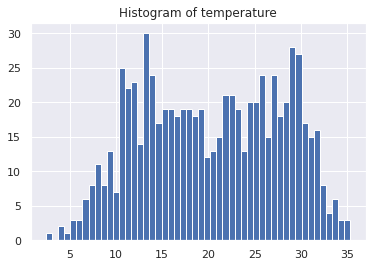

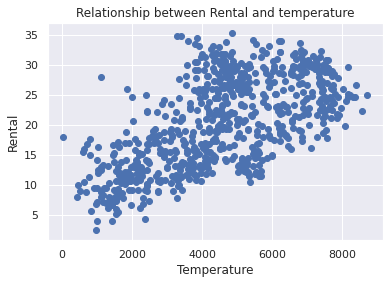

In [13]:
# Plot the histogram for temprature variable
plt.hist(rental_df["temp"], bins =50)
plt.title("Histogram of temperature")
plt.show()

fig, ax = plt.subplots()
# scatter the rental against the temperature
ax.scatter(rental_df['rental'], rental_df['temp'])
# set a title and labels
ax.set_title('Relationship between Rental and temperature')
ax.set_xlabel('Temperature')
ax.set_ylabel('Rental')
plt.show()

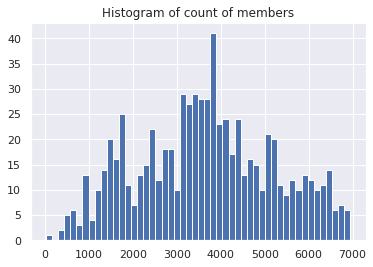

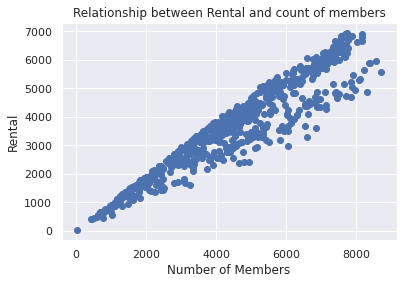

In [14]:
# Plot the histogram for temprature variable
plt.hist(rental_df["members"], bins =50)
plt.title("Histogram of count of members")
plt.show()

fig, ax = plt.subplots()
# scatter the rental against the number of members
ax.scatter(rental_df['rental'], rental_df['members'])
# set a title and labels
ax.set_title('Relationship between Rental and count of members')
ax.set_xlabel('Number of Members')
ax.set_ylabel('Rental')
plt.show()

### Descriptive Statistics - Notes

2.1 & 2.2: Describe up to 3 important variables (please see summary tables and plots above) 
1) temp: The temperature variable is a numerical variable, linearly related with our response, predictor. It is also highly co-related with the feel_temperature variable. The histogram suggests it is bimodel, possibly normally distributed with mean 20.310776, and standard deviation of 7 degrees. <br>
2) Members: The members variable is highly correlated with our response (correlation = 0.945517), seems to be normally distributed with count of members average at around 3650, and standard deviation of approximately 1560. <br>
3) Season is a categorical variable, with a weak positive relationship with our response. When we look at our response with season as the categorical variable (see the second pairplot above), we notice that in each season the rentals seem to be normally distributed, but highly skewed for some of them. For example, season 1, spring, color coded as yellow, is right / positively skewed. <br>

2.3: Determine if outliers are present. Are there any? How should they be handled? <br>

We can identify outliers by looking at the boxplots, or by seeing if the value is outside of the 1.5*(IQR) range. We can also look at the zscore, and see which values are beyond + or - 3. To handle these outliers, we can remove them, or replace them with a different value (which would be more representive of the dataset)  

In [15]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   obs                731 non-null    int64  
 1   date               731 non-null    object 
 2   season             731 non-null    int64  
 3   holiday            731 non-null    int64  
 4   working_day        731 non-null    int64  
 5   weather_condition  731 non-null    int64  
 6   temp               731 non-null    float64
 7   feel_temp          731 non-null    float64
 8   humidity           731 non-null    float64
 9   wind_speed         731 non-null    float64
 10  occasional         731 non-null    int64  
 11  members            731 non-null    int64  
 12  rental             731 non-null    int64  
 13  year               731 non-null    object 
 14  month              731 non-null    object 
dtypes: float64(4), int64(8), object(3)
memory usage: 85.8+ KB


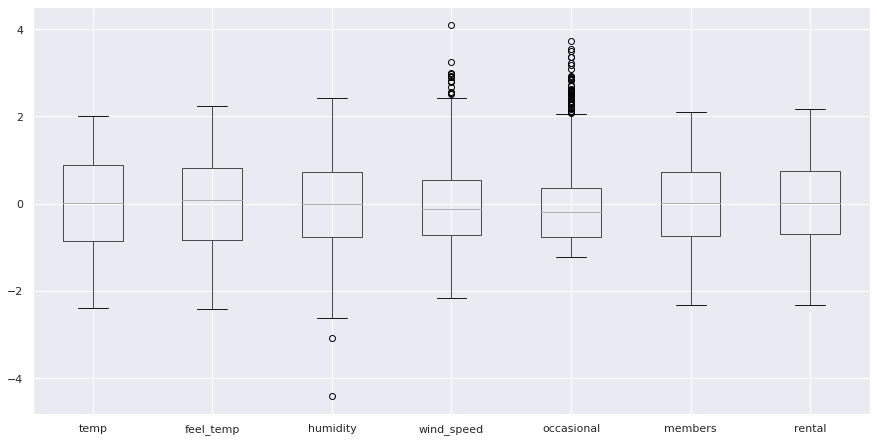

In [16]:
# Get only the numerical columns for boxplot
cols = rental_df.drop(["obs", "date", "season", "holiday", "working_day", "weather_condition", "year", "month"], axis=1)
# Scale the values for the boxplot to work
normalized_df=(cols-cols.mean())/cols.std()
normalized_df.boxplot(figsize=(15,7.5))
plt.show()

Here, we can see that the are ALOT outliers are present in occasional and wind_speed column, and some in humidity column

In [17]:
# Finding outliers
Q1 = normalized_df.quantile(0.25)
Q3 = normalized_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# Now we can go through each numerical column and see if it meets these conditions. 
print(normalized_df < (Q1 - 1.5 * IQR)) or (normalized_df > (Q3 + 1.5 * IQR))

# Note that it's also easy to filter out these values, with just one line of code!
# normalized_df[~((normalized_df < (Q1 - 1.5 * IQR)) |(normalized_df > (Q3 + 1.5 * IQR))).any(axis=1)]

temp          1.739040
feel_temp     1.661497
humidity      1.475882
wind_speed    1.267964
occasional    1.136724
members       1.460978
rental        1.447441
dtype: float64
      temp  feel_temp  humidity  wind_speed  occasional  members  rental
0    False      False     False       False       False    False   False
1    False      False     False       False       False    False   False
2    False      False     False       False       False    False   False
3    False      False     False       False       False    False   False
4    False      False     False       False       False    False   False
..     ...        ...       ...         ...         ...      ...     ...
726  False      False     False       False       False    False   False
727  False      False     False       False       False    False   False
728  False      False     False       False       False    False   False
729  False      False     False       False       False    False   False
730  False      False

temp  feel_temp  humidity  wind_speed  occasional  members  rental
0    False      False     False       False       False    False   False
1    False      False     False       False       False    False   False
2    False      False     False       False       False    False   False
3    False      False     False       False       False    False   False
4    False      False     False       False       False    False   False
..     ...        ...       ...         ...         ...      ...     ...
726  False      False     False       False       False    False   False
727  False      False     False       False       False    False   False
728  False      False     False       False       False    False   False
729  False      False     False       False       False    False   False
730  False      False     False       False       False    False   False

[731 rows x 7 columns]

Unfortunately I am running out of time so if the next few parts isn't too polished, we can discuss it during the interview

2.4: Demonstrate that the number of rentalsvaries according to the season

<Figure size 432x288 with 0 Axes>

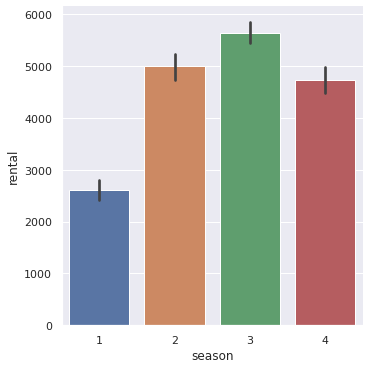

<Figure size 432x288 with 0 Axes>

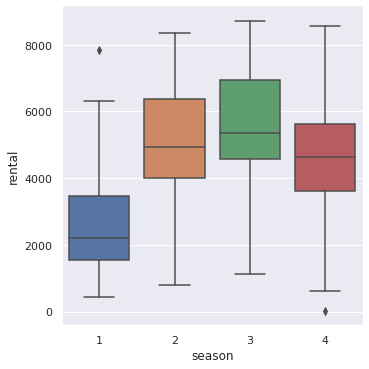

In [18]:
# Barplot according to season category
plt.figure()
sns.catplot(x="season", y="rental", kind="bar", data=rental_df)
plt.show()

# Boxplot according to category
plt.figure()
sns.catplot(x="season", y="rental", kind="box", data=rental_df)
plt.show()


Here we can see that season 3, Fall has the most number of rentals. 

## Modelling - Question 3.1 - 3.4

In [19]:
rental_df.corr() # We can also use best subset, fw, backward subset or lasso regression to select features.

obs    season   holiday  working_day  \
obs                1.000000  0.412224  0.016145    -0.004337   
season             0.412224  1.000000 -0.010537     0.012485   
holiday            0.016145 -0.010537  1.000000    -0.253023   
working_day       -0.004337  0.012485 -0.253023     1.000000   
weather_condition -0.021477  0.019211 -0.034627     0.061200   
temp               0.150580  0.334315 -0.028556     0.052660   
feel_temp          0.152638  0.342876 -0.032507     0.052182   
humidity           0.016375  0.205445 -0.015937     0.024327   
wind_speed        -0.112620 -0.229046  0.006292    -0.018796   
occasional         0.275255  0.210399  0.054274    -0.518044   
members            0.659623  0.411623 -0.108745     0.303907   
rental             0.628830  0.406100 -0.068348     0.061156   

                   weather_condition      temp  feel_temp  humidity  \
obs                        -0.021477  0.150580   0.152638  0.016375   
season                      0.019211  0.334315   0.342876  0.205445   
holiday                    -0.034627 -0.028556  -0.032507 -0.015937   
working_day                 0.061200  0.052660   0.052182  0.024327   
weather_condition           1.000000 -0.120602  -0.121583  0.591045   
temp                       -0.120602  1.000000   0.991702  0.126963   
feel_temp                  -0.121583  0.991702   1.000000  0.139988   
humidity                    0.591045  0.126963   0.139988  1.000000   
wind_speed                  0.039511 -0.157944  -0.183643 -0.248489   
occasional                 -0.247353  0.543285   0.543864 -0.077008   
members                    -0.260388  0.540012   0.544192 -0.091089   
rental                     -0.297391  0.627494   0.631066 -0.100659   

                   wind_speed  occasional   members    rental  
obs                 -0.112620    0.275255  0.659623  0.628830  
season              -0.229046    0.210399  0.411623  0.406100  
holiday              0.006292    0.054274 -0.108745 -0.068348  
working_day         -0.018796   -0.518044  0.303907  0.061156  
weather_condition    0.039511   -0.247353 -0.260388 -0.297391  
temp                -0.157944    0.543285  0.540012  0.627494  
feel_temp           -0.183643    0.543864  0.544192  0.631066  
humidity            -0.248489   -0.077008 -0.091089 -0.100659  
wind_speed           1.000000   -0.167613 -0.217449 -0.234545  
occasional          -0.167613    1.000000  0.395282  0.672804  
members             -0.217449    0.395282  1.000000  0.945517  
rental              -0.234545    0.672804  0.945517  1.000000

In [30]:
rental_df.head()

obs      date  season  holiday  working_day  weather_condition       temp  \
0    1  1/1/2011       1        0            0                  2  14.110847   
1    2  1/2/2011       1        0            0                  2  14.902598   
2    3  1/3/2011       1        0            1                  1   8.050924   
3    4  1/4/2011       1        0            1                  1   8.200000   
4    5  1/5/2011       1        0            1                  1   9.305237   

   feel_temp  humidity  wind_speed  occasional  members  year month  
0   18.18125  0.805833   10.749882         331      654  2011     1  
1   17.68695  0.696087   16.652113         131      670  2011     1  
2    9.47025  0.437273   16.636703         120     1229  2011     1  
3   10.60610  0.590435   10.739832         108     1454  2011     1  
4   11.46350  0.436957   12.522300          82     1518  2011     1

In [20]:
# Split the data into train and test
# Drop uninformative variables and the target variable
all_features = rental_df.drop(['rental', 'obs', 'holiday', 'weather_condition', 'humidity', 'wind_speed', 'date' ], axis=1)
target = rental_df.pop('rental')

(731,)

In [21]:
train_features , test_features, train_targets, test_targets = train_test_split(all_features, target, test_size=0.2, random_state=123)

(731, 8)
(731,)
(584,)
(147, 8)


In [22]:
# Initialize all models in a list
models = [LinearRegression(),
          Ridge(alpha=0.1),
          Lasso(alpha = 2),
          DecisionTreeRegressor(max_depth=5),
          MLPRegressor()
         ]
# Define all the model names
model_names = ["Linear Regression",
               "Ridge Regression",
               "Lasso Regression",
               "Decision Tree",
               "Neural Network"
              ]
# Print the data size
print("Training Data size: {}".format(train_features.shape))

# Loop over models instead of having separate cell per model
for name, model in zip(model_names, models):
    model.random_state = 0
    print("Training Model :  {}".format(name))
    model.fit(train_features, train_targets)
    print("Done Training {}".format(name))
    test_score = model.score(test_features, test_targets) * 100
    train_score = model.score(train_features, train_targets) * 100
    print("{} Train Score : {}".format(name, train_score))
    print("{} Test Score : {}".format(name, test_score))
    print("~"*50)
    print("Model Done")
    print("~"*50)

print("*"*50)    
print("~"*50)
print("ALL MODELS DONE")
print("~"*50)
print("*"*50)

Training Data size: (584, 8)
Training Model :  Linear Regression
Done Training Linear Regression
Linear Regression Train Score : 100.0
Linear Regression Test Score : 100.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Model Done
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training Model :  Ridge Regression
Done Training Ridge Regression
Ridge Regression Train Score : 100.0
Ridge Regression Test Score : 100.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Model Done
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training Model :  Lasso Regression
Done Training Lasso Regression
Lasso Regression Train Score : 99.9999999951038
Lasso Regression Test Score : 99.99999999574402
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Model Done
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training Model :  Decision Tree
Done Training Decision Tree
Decision Tree Train Score : 98.18233749304248
Decision Tree Test Score : 96.56210033664053
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Discussion
From the above models each model has a different score metric.
for example, sklearn uses R^2 as the score metric for linear models, which is probably why we are getting 100% Score.  
Thus, the score methods aren't so valid for the linear models with Sklearn. We can see that Neural nets and decision trees did fairly well aswell. If I was to pick a model, it would most likely still pick a simpler model, such as one form of regression or decision trees, as they are easier to intrepret and explain over more complicated models such as neural nets. <br>

Improvements if I had more time: <br> 
- Definetly use the proper score method for each model (i.e MSE for regresssion).
- Preform feature selection with either best / Forward / Backward or lasso selection.
- Do hyperparamter tuning using gridsearch